# Broad

Broadening line spectrum with voigt profile

In [1]:
import sys
sys.path.append('C:/Users/Reddy/Desktop/TRXASprefitpack/src')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from TRXASprefitpack import gen_theory_data
plt.rcParams["figure.figsize"] = (14,10)

## basic defintion of gen_theory_data

In [3]:
help(gen_theory_data)

Help on function gen_theory_data in module TRXASprefitpack.mathfun.broad:

gen_theory_data(e: numpy.ndarray, peaks: numpy.ndarray, A: float, fwhm_G: float, fwhm_L: float, peak_factor: float, policy: Optional[str] = 'shift') -> numpy.ndarray
    voigt broadening theoretically calculated lineshape spectrum
    
    Args:
        e: energy 
        A: scaling parameter
        fwhm_G: full width at half maximum of gaussian shape (unit: same as energy)
        fwhm_L: full width at half maximum of lorenzian shape (unit: same as energy)
        peak_factor: Peak factor, its behavior depends on policy.
        policy: Policy to match discrepency between experimental data and theoretical
                spectrum.
                1. 'shift' : Default option, shift peak position by peak_factor
                2. 'scale' : scale peak position by peak_factor
    
    Returns:
      numpy ndarray of voigt broadened theoritical lineshape spectrum



## Define line spectrum
Which has three peaks at 2833, 2835, 2838 eV with ratio 2:4:1

In [4]:
peaks = np.array([[2833, 2],
                 [2835, 4],
                 [2838, 2]])

In [5]:
e = np.arange(2830,2845, 0.01)

## Gaussian broadening

1. fwhm_G = 1 eV
2. fwhm_G = 2 eV
3. fwhm_G = 3 eV

In [6]:
gau_broad_1eV = gen_theory_data(e, peaks, 1, 1, 0, 0) # Note voigt profile with fwhm_L = 0 is gaussian
gau_broad_2eV = gen_theory_data(e, peaks, 1, 2, 0, 0) # Note voigt profile with fwhm_L = 0 is gaussian
gau_broad_3eV = gen_theory_data(e, peaks, 1, 3, 0, 0) # Note voigt profile with fwhm_L = 0 is gaussian

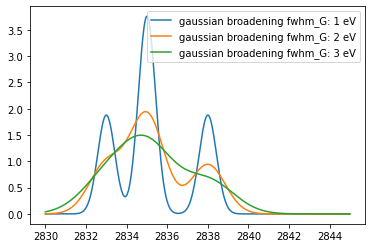

In [7]:
plt.plot(e, gau_broad_1eV, label='gaussian broadening fwhm_G: 1 eV')
plt.plot(e, gau_broad_2eV, label='gaussian broadening fwhm_G: 2 eV')
plt.plot(e, gau_broad_3eV, label='gaussian broadening fwhm_G: 3 eV')
plt.legend()
plt.show()

## Lorenzian broadening

1. fwhm_L = 1 eV
2. fwhm_L = 2 eV
3. fwhm_L = 3 eV

In [8]:
loren_broad_1eV = gen_theory_data(e, peaks, 1, 0, 1, 0) # Note voigt profile with fwhm_G = 0 is lorenzian
loren_broad_2eV = gen_theory_data(e, peaks, 1, 0, 2, 0) # Note voigt profile with fwhm_G = 0 is lorenzian
loren_broad_3eV = gen_theory_data(e, peaks, 1, 0, 3, 0) # Note voigt profile with fwhm_G = 0 is lorenzian

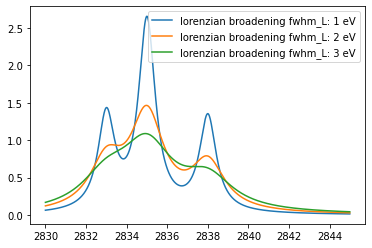

In [9]:
plt.plot(e, loren_broad_1eV, label='lorenzian broadening fwhm_L: 1 eV')
plt.plot(e, loren_broad_2eV, label='lorenzian broadening fwhm_L: 2 eV')
plt.plot(e, loren_broad_3eV, label='lorenzian broadening fwhm_L: 3 eV')
plt.legend()
plt.show()

## voigt broadening

1. fwhm_G = 1.5eV, fwhm_L = 0.5eV
2. fwhm_G = 1.0eV, fwhm_L = 1.0eV
3. fwhm_G = 0.5eV, fwhm_L = 1.5eV

In [10]:
voigt_broad_1 = gen_theory_data(e, peaks, 1, 1.5, 0.5, 0) 
voigt_broad_2 = gen_theory_data(e, peaks, 1, 1.0, 1.0, 0) 
voigt_broad_3 = gen_theory_data(e, peaks, 1, 0.5, 1.5, 0) 

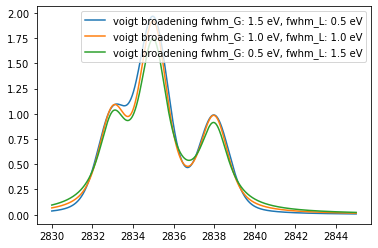

In [11]:
plt.plot(e, voigt_broad_1, label='voigt broadening fwhm_G: 1.5 eV, fwhm_L: 0.5 eV')
plt.plot(e, voigt_broad_2, label='voigt broadening fwhm_G: 1.0 eV, fwhm_L: 1.0 eV')
plt.plot(e, voigt_broad_3, label='voigt broadening fwhm_G: 0.5 eV, fwhm_L: 1.5 eV')
plt.legend()
plt.show()

# peak shift

To see how peak shift afftects broadened spectrum, 
set fwhm_G = fwhm_L = 1.0 eV

In [12]:
voigt_broad_peak_shift0 = gen_theory_data(e, peaks, 1, 1.0, 1.0, 0)
voigt_broad_peak_shiftm5 = gen_theory_data(e, peaks, 1, 1.0, 1.0, -5) 
voigt_broad_peak_shift5 = gen_theory_data(e, peaks, 1, 1.0, 1.0, 5) 

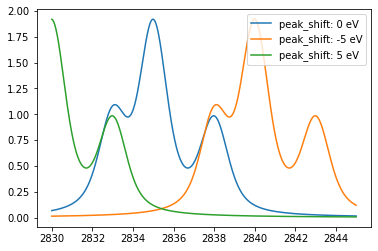

In [13]:
plt.plot(e, voigt_broad_peak_shift0, label='peak_shift: 0 eV')
plt.plot(e, voigt_broad_peak_shiftm5, label='peak_shift: -5 eV')
plt.plot(e, voigt_broad_peak_shift5, label='peak_shift: 5 eV')
plt.legend()
plt.show()

peak_shift moves spectrum to -peak_shift.

## Intensity scaling
To see how intensity scaling afftects spectrum fix fwhm_G=fwhm_L=1.0 eV and peak_shift=0
1. A: 0.5
2. A: 1.0
3. A: 2.0

In [14]:
voigt_broad_scale_half = gen_theory_data(e, peaks, 0.5, 1.0, 1.0, 0)
voigt_broad_scale1 = gen_theory_data(e, peaks, 1, 1.0, 1.0, 0) 
voigt_broad_scale2 = gen_theory_data(e, peaks, 2, 1.0, 1.0, 0) 

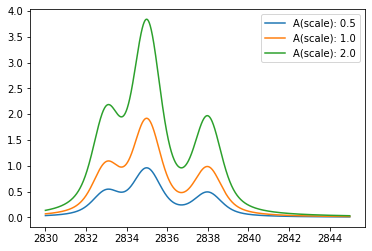

In [15]:
plt.plot(e, voigt_broad_scale_half, label='A(scale): 0.5')
plt.plot(e, voigt_broad_scale1, label='A(scale): 1.0')
plt.plot(e, voigt_broad_scale2, label='A(scale): 2.0')
plt.legend()
plt.show()

## Peak position scaling 

Different from electron-excited spectrum, one can match theoretically calculated vibrational spectrum (IR, Raman) to experimental one by uniformly scaling peak position of theoretically calculated peaks
``gen_thoery_data`` scales peak position instead of shifting by setting ``policy`` argument to ``scale``

In [18]:
thy_ir_peak = np.array([[235, 661, 917, 1181, 1298, 1348, 1501, 1688, 3172, 3178, 3195
, 618, 826, 1036, 1175, 1200, 1394, 1433, 1501, 1597, 3181, 3208
, 92, 388, 484, 746, 892, 962]
, 
[1.284, 0.803, 1.7269, 4.6578, 8.2517, 4.191, 1.2156, 6.8394, 10.9014, 16.4984, 73.323
, 8.1709, 0.0041, 3.9287, 1.2982, 1.6477, 4.005, 0.5812, 1.8711, 4.4402, 3.00e-04, 77.3937
, 0.8536, 0.0804, 12.81, 59.6901, 55.4987, 6.1347]])
thy_ir_peak = thy_ir_peak.T 

nu = np.arange(200, 3500, 1)

fwhm_G = 15 # cm-1

pos_scale_1 = gen_theory_data(nu, thy_ir_peak, 1, fwhm_G, 0, 0.95, policy='scale')
pos_scale_2 = gen_theory_data(nu, thy_ir_peak, 1, fwhm_G, 0, 1, policy='scale')
pos_scale_3 = gen_theory_data(nu, thy_ir_peak, 1, fwhm_G, 0, 1.05, policy='scale')

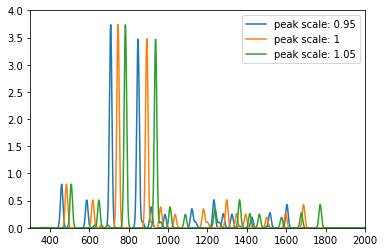

In [25]:
plt.plot(nu, pos_scale_1, label='peak scale: 0.95')
plt.plot(nu, pos_scale_2, label='peak scale: 1')
plt.plot(nu, pos_scale_3, label='peak scale: 1.05')
plt.legend()
plt.xlim(300, 2000)
plt.ylim(0, 4.0)
plt.show()

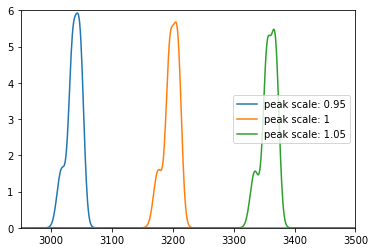

In [26]:
plt.plot(nu, pos_scale_1, label='peak scale: 0.95')
plt.plot(nu, pos_scale_2, label='peak scale: 1')
plt.plot(nu, pos_scale_3, label='peak scale: 1.05')
plt.legend()
plt.xlim(2950, 3500)
plt.ylim(0, 6)
plt.show()